In [15]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from pprint import pprint
import _pickle as pickle

import time

In [2]:
# My libraries
import sim_ann as sa
import model

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Perform simulated annealing.

Change the values for min and max temperature and alpha in the file sim_ann.py. 

In [4]:
t0 = time.time()
parameters, cost_hist, parameters_hist = sa.parameter_tuning()
t1 = time.time()
total = t1-t0
print('Total time spent: ', total)

Temp:  1.0
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
Lower!
accepted!
Lower!
Lower!
Lower!
accepted!
Lower!
Lower!
{'arousal': [0.8205744428215925, 3.595163826749955],
 'attention_1': [2.7742609673655707, 1.7938753215180268],
 'attention_2': [0.508895018922632, 4.711393123380777],
 'comment': [0.7, 10],
 'ff_ent': [1.0163179346811122, 1.8446606662372327],
 'ff_is': [1.6528138032166808, 4.936913128399061],
 'ff_ko': [1.2662969572606193, 1.6400904139090664],
 'ff_se': [2.940986781473974, 2.198168409410691],
 'ff_si': [1.1289572608970704, 4.891025124690694],
 'like': [0.7, 10],
 'mood': [1.0382384117460102, 4.384038432970127],
 'mood_speed': 0.019427056421466044,
 'prep_comm': [4.059746615080833, 2.4082126119057],
 'prep_like': [2.9099167345960546, 1.8524801371790023],
 'prep_share': [2.0440093031511184, 2.0442939981947537],
 'satisfaction': [0.6925319691768033, 4.42123593091205],
 'share': [0.7, 10],
 'srs_sal': [0.6729006844623657, 1.3744929593639559]}
320.388632729
Temp:  0.7
Lower!
Lo

{'arousal': [0.9267119346084123, 5.412562575923616],
 'attention_1': [2.7754940766809373, 3.1648237869910507],
 'attention_2': [0.5394766607445791, 3.13617952020417],
 'comment': [0.7, 10],
 'ff_ent': [1.189522411545804, 1.6162508803121982],
 'ff_is': [1.2301418690395738, 3.6994906946641555],
 'ff_ko': [1.3496818459669533, 3.958097195730203],
 'ff_se': [2.3985619058822425, 3.4937910866750417],
 'ff_si': [1.21131953100803, 8.210036441814625],
 'like': [0.7, 10],
 'mood': [0.3316507200941301, 4.860118310875158],
 'mood_speed': 0.05213639876794541,
 'prep_comm': [3.976073751868869, 4.33505001613087],
 'prep_like': [2.29079408091014, 2.086410827301151],
 'prep_share': [2.0694940893416383, 0.7168347635223891],
 'satisfaction': [0.7761208466371939, 1.938565924465197],
 'share': [0.7, 10],
 'srs_sal': [1.1291535986250307, 1.4534392352092107]}
267.943503515
Temp:  0.028247524899999984
Lower!
{'arousal': [0.9790265764978288, 5.542426434255777],
 'attention_1': [2.7582101406972135, 3.06457794690

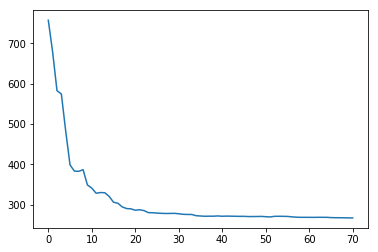

In [5]:
plt.plot(cost_hist)

## Dumping the simulated annealing results

In [6]:
with open('pickle/parameters.txt', 'wb') as fp:
    pickle.dump(parameters, fp)

with open('pickle/cost_hist.txt', 'wb') as fp:
    pickle.dump(cost_hist, fp)

with open('pickle/parameters_hist.txt', 'wb') as fp:
    pickle.dump(parameters_hist, fp)
    

## Loading simulated annealing results

with open ('pickle/parameters.txt', 'rb') as fp:
    parameters = pickle.load(fp)

with open ('pickle/cost_hist.txt', 'rb') as fp:
    cost_hist = pickle.load(fp)

with open ('pickle/parameters_hist.txt', 'rb') as fp:
    parameters_hist = pickle.load(fp)

## Process results

In [7]:
#steepness values from 0.5 (for four arrows), 0.7 (for three arrows),  1 (for two arrows) to 2.5 (for 1 arrow)
a = parameters_hist[-1]

In [8]:
a

{'arousal': [1.1105403095377862, 5.582967569864919],
 'attention_1': [2.6925904379038808, 3.8125287423426895],
 'attention_2': [0.5687001547671743, 4.221186559286209],
 'comment': [0.7, 10],
 'ff_ent': [1.3864556511912316, 1.5344265779098936],
 'ff_is': [1.20198578150972, 3.9206172827989665],
 'ff_ko': [1.3975862950140827, 3.5492023950789178],
 'ff_se': [2.614554334980537, 3.5969491926822963],
 'ff_si': [1.118639680498832, 8.352741136320283],
 'like': [0.7, 10],
 'mood': [0.30619930130474127, 5.7005369834402915],
 'mood_speed': 0.06373925691442775,
 'prep_comm': [4.0732638827191145, 3.678249764674701],
 'prep_like': [2.0953454328570156, 2.327884974468677],
 'prep_share': [2.2805705634124442, 1.196186040640701],
 'satisfaction': [0.7305566495862593, 1.6082954852589848],
 'share': [0.7, 10],
 'srs_sal': [0.959951859201964, 1.0497056255646422]}

In [9]:
new_cost = sa.get_error(a)

In [10]:
new_cost

(267.11858047785233,
 {'arousal': [1.1105403095377862, 5.582967569864919],
  'attention_1': [2.6925904379038808, 3.8125287423426895],
  'attention_2': [0.5687001547671743, 4.221186559286209],
  'comment': [0.7, 10],
  'ff_ent': [1.3864556511912316, 1.5344265779098936],
  'ff_is': [1.20198578150972, 3.9206172827989665],
  'ff_ko': [1.3975862950140827, 3.5492023950789178],
  'ff_se': [2.614554334980537, 3.5969491926822963],
  'ff_si': [1.118639680498832, 8.352741136320283],
  'like': [0.7, 10],
  'mood': [0.30619930130474127, 5.7005369834402915],
  'mood_speed': 0.06373925691442775,
  'prep_comm': [4.0732638827191145, 3.678249764674701],
  'prep_like': [2.0953454328570156, 2.327884974468677],
  'prep_share': [2.2805705634124442, 1.196186040640701],
  'satisfaction': [0.7305566495862593, 1.6082954852589848],
  'share': [0.7, 10],
  'srs_sal': [0.959951859201964, 1.0497056255646422]},
           mood      like     share   comment
 19    0.845457  0.035915  0.026402  0.000003
 39    0.95575

In [11]:
mood = 0.5

# Get the traits for the agents
validation_f = 'validation/'

agent1 = pd.read_csv(validation_f+'agent_1.csv')
agent2 = pd.read_csv(validation_f+'agent_2.csv')
agent3 = pd.read_csv(validation_f+'agent_3.csv')

a1_dict = agent1.to_dict()
a2_dict = agent2.to_dict()
a3_dict = agent3.to_dict()

#[pt_con, nf_ko, nf_ent, nf_is, nf_si, nf_se, mood]
a1_traits = [a1_dict['nf_ko'][0], a1_dict['nf_ent'][0], a1_dict['nf_is'][0], 
             a1_dict['nf_si'][0], a1_dict['nf_se'][0], a1_dict['pt_con'][0], mood]
a2_traits = [a2_dict['nf_ko'][0], a2_dict['nf_ent'][0], a2_dict['nf_is'][0], 
             a2_dict['nf_si'][0], a2_dict['nf_se'][0], a2_dict['pt_con'][0], mood]
a3_traits = [a3_dict['nf_ko'][0], a3_dict['nf_ent'][0], a3_dict['nf_is'][0], 
             a3_dict['nf_si'][0], a3_dict['nf_se'][0], a3_dict['pt_con'][0], mood]


# Get validation data set
data_a1 = pd.read_csv(validation_f+'validation_agent_1.csv')
data_a2 = pd.read_csv(validation_f+'validation_agent_2.csv')
data_a3 = pd.read_csv(validation_f+'validation_agent_3.csv')

messages1 = data_a1[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages2 = data_a2[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]
messages3 = data_a3[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 
                    'msg_cat_con', 'msg_rel', 'msg_qua', 'msg_sen', 
                    'msg_sal', 'msg_med', 'msg_com', 'msg_que']]

reactions1 = data_a1[['mood', 'like', 'comment', 'share']]
reactions2 = data_a2[['mood', 'like', 'comment', 'share']]
reactions3 = data_a3[['mood', 'like', 'comment', 'share']]

# Agent 1

In [12]:
inputsDF, parameters = model.run_message_sequence(messages1.values, a1_traits,parameters, 'nb1')

In [13]:
parameters

{'arousal': [1.1105403095377862, 5.582967569864919],
 'attention_1': [2.6925904379038808, 3.8125287423426895],
 'attention_2': [0.5687001547671743, 4.221186559286209],
 'comment': [0.7, 10],
 'ff_ent': [1.3864556511912316, 1.5344265779098936],
 'ff_is': [1.20198578150972, 3.9206172827989665],
 'ff_ko': [1.3975862950140827, 3.5492023950789178],
 'ff_se': [2.614554334980537, 3.5969491926822963],
 'ff_si': [1.118639680498832, 8.352741136320283],
 'like': [0.7, 10],
 'mood': [0.30619930130474127, 5.7005369834402915],
 'mood_speed': 0.06373925691442775,
 'prep_comm': [4.0732638827191145, 3.678249764674701],
 'prep_like': [2.0953454328570156, 2.327884974468677],
 'prep_share': [2.2805705634124442, 1.196186040640701],
 'satisfaction': [0.7305566495862593, 1.6082954852589848],
 'share': [0.7, 10],
 'srs_sal': [0.959951859201964, 1.0497056255646422]}

## Inputs

### Message Categories

Text(0.5,0,'Time step')

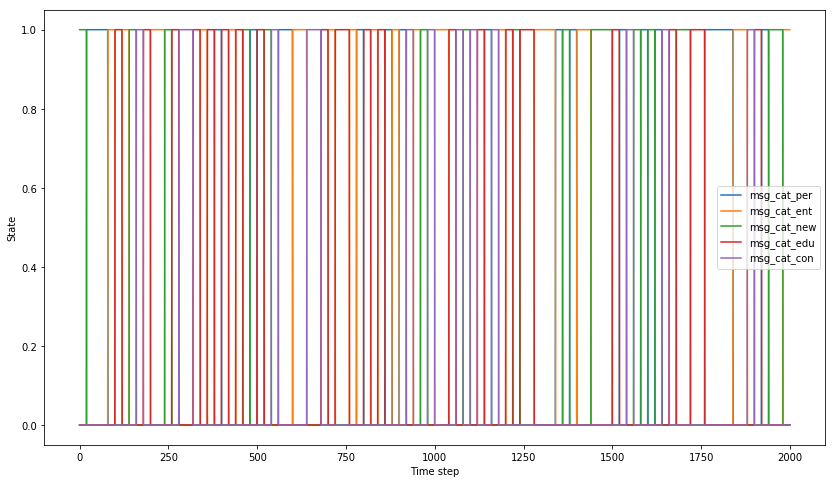

In [14]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

Text(0.5,0,'Time step')

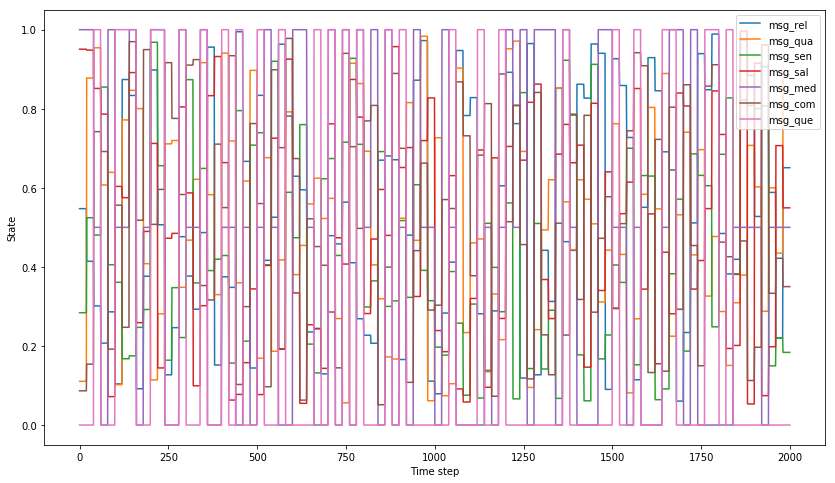

In [15]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

Text(0.5,0,'Time step')

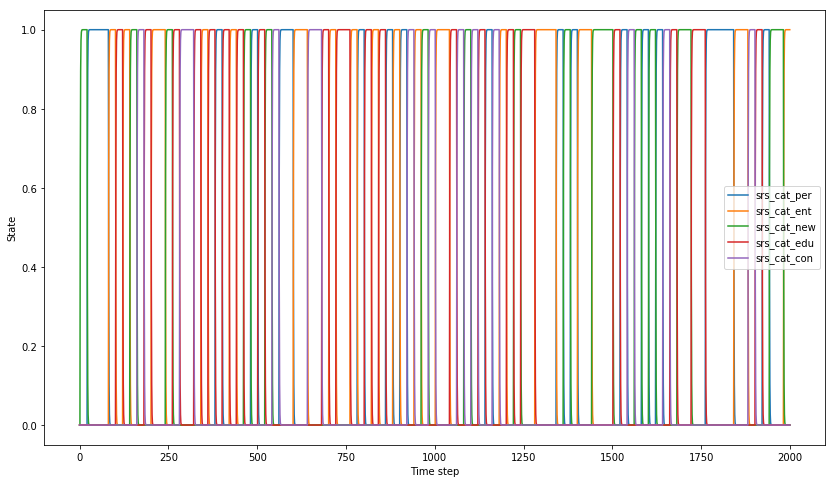

In [16]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

Text(0.5,0,'Time step')

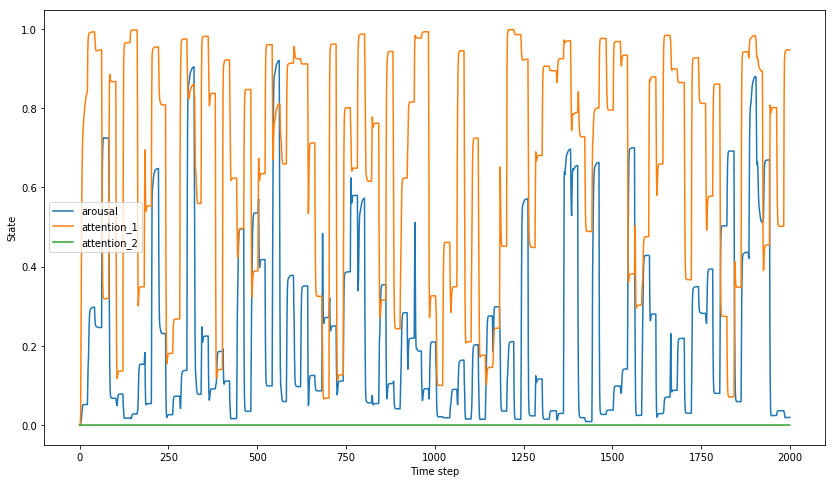

In [17]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### FFs

Text(0.5,0,'Time step')

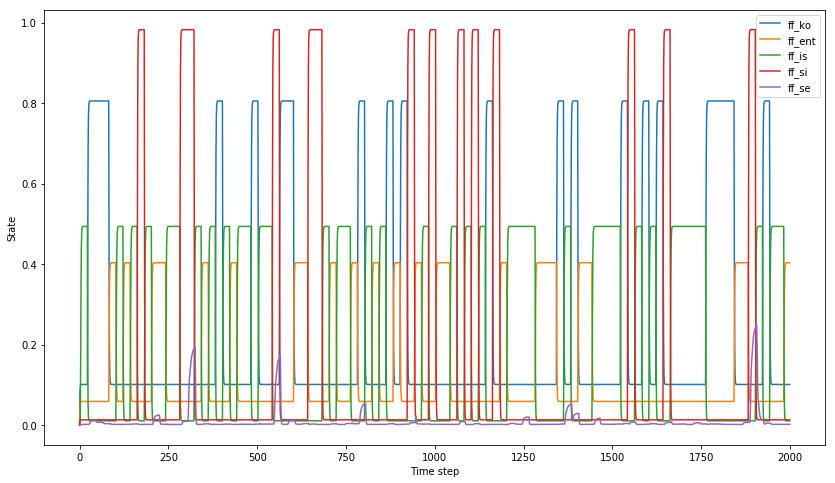

In [18]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction

Text(0.5,0,'Time step')

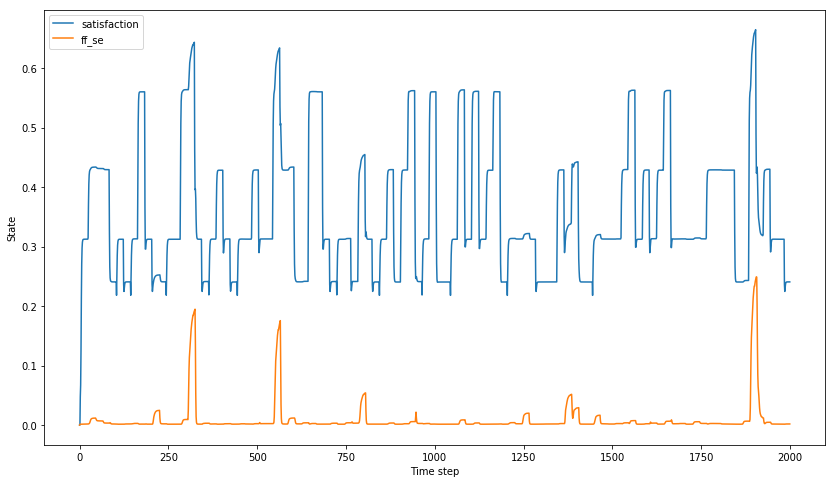

In [19]:
inputsDF[['satisfaction', 'ff_se']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

Text(0.5,0,'Time step')

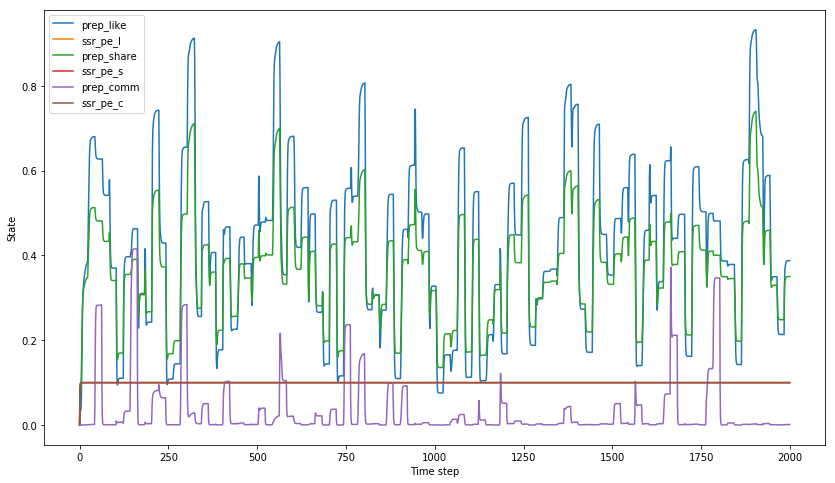

In [20]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot(figsize=((14,8)))
plt.ylabel('State')
plt.xlabel('Time step')
#plt.rcParams["figure.figsize"] = (15,8)

### Outputs

Text(0.5,0,'Time step')

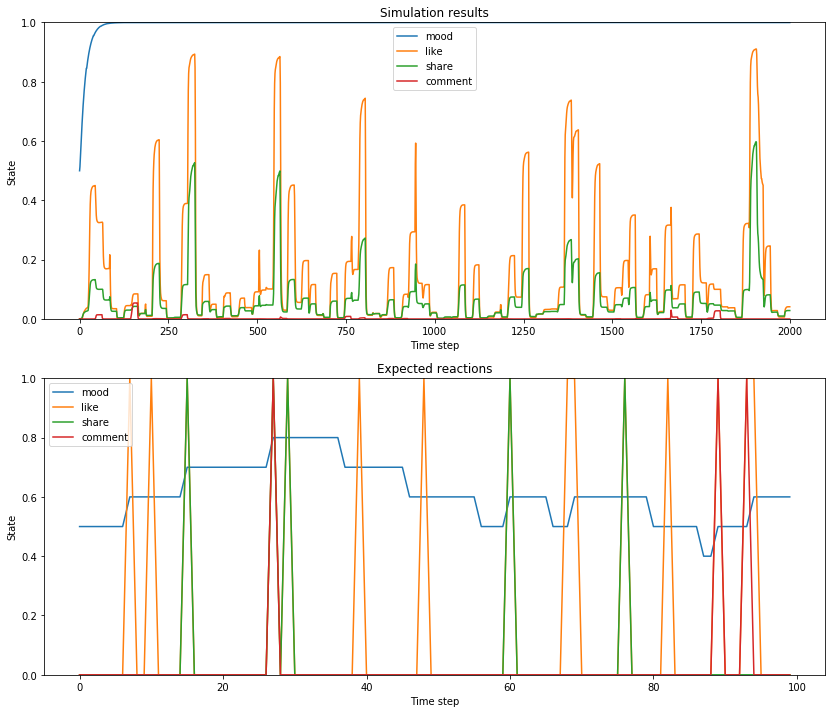

In [21]:
fig = plt.figure(figsize=((14,12)))

ax1 = fig.add_subplot(211)
inputsDF[['mood', 'like', 'share', 'comment']].plot(ax=ax1, title='Simulation results')
plt.ylabel('State')
plt.xlabel('Time step')
plt.ylim(0,1)

ax2 = fig.add_subplot(212)
reactions1[['mood', 'like', 'share', 'comment']].plot(ax=ax2, title='Expected reactions')
plt.ylim(0,1)
plt.ylabel('State')
plt.xlabel('Time step')

#plt.rcParams["figure.figsize"] = (15,8)

In [22]:
inputsDF.columns

Index(['arousal', 'attention_1', 'attention_2', 'comment', 'ff_ent', 'ff_is',
       'ff_ko', 'ff_se', 'ff_si', 'like', 'mood', 'msg_cat_con', 'msg_cat_edu',
       'msg_cat_ent', 'msg_cat_new', 'msg_cat_per', 'msg_com', 'msg_med',
       'msg_qua', 'msg_que', 'msg_rel', 'msg_sal', 'msg_sen', 'nf_ent',
       'nf_is', 'nf_ko', 'nf_se', 'nf_si', 'prep_comm', 'prep_like',
       'prep_share', 'pt_cons', 'satisfaction', 'share', 'srs_cat_con',
       'srs_cat_edu', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_per', 'srs_com',
       'srs_med', 'srs_qua', 'srs_que', 'srs_rel', 'srs_sal', 'srs_sen',
       'ss_cat_con', 'ss_cat_edu', 'ss_cat_ent', 'ss_cat_new', 'ss_cat_per',
       'ss_com', 'ss_med', 'ss_qua', 'ss_que', 'ss_rel', 'ss_sal', 'ss_sen',
       'ssr_pe_c', 'ssr_pe_l', 'ssr_pe_s'],
      dtype='object')

# Agent 2

In [23]:
inputsDF, parameters = model.run_message_sequence(messages2.values, a2_traits,parameters, 'nb3')

In [24]:
parameters

{'arousal': [1.1105403095377862, 5.582967569864919],
 'attention_1': [2.6925904379038808, 3.8125287423426895],
 'attention_2': [0.5687001547671743, 4.221186559286209],
 'comment': [0.7, 10],
 'ff_ent': [1.3864556511912316, 1.5344265779098936],
 'ff_is': [1.20198578150972, 3.9206172827989665],
 'ff_ko': [1.3975862950140827, 3.5492023950789178],
 'ff_se': [2.614554334980537, 3.5969491926822963],
 'ff_si': [1.118639680498832, 8.352741136320283],
 'like': [0.7, 10],
 'mood': [0.30619930130474127, 5.7005369834402915],
 'mood_speed': 0.06373925691442775,
 'prep_comm': [4.0732638827191145, 3.678249764674701],
 'prep_like': [2.0953454328570156, 2.327884974468677],
 'prep_share': [2.2805705634124442, 1.196186040640701],
 'satisfaction': [0.7305566495862593, 1.6082954852589848],
 'share': [0.7, 10],
 'srs_sal': [0.959951859201964, 1.0497056255646422]}

## Inputs

### Message Categories

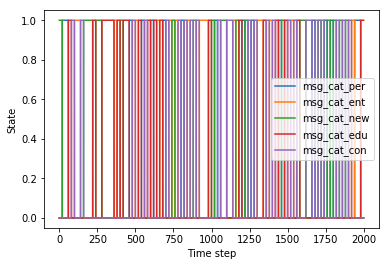

In [25]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

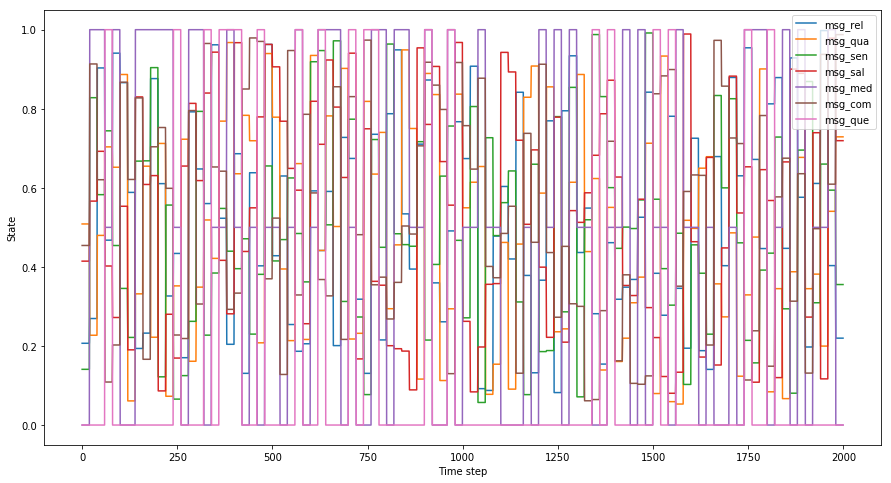

In [26]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

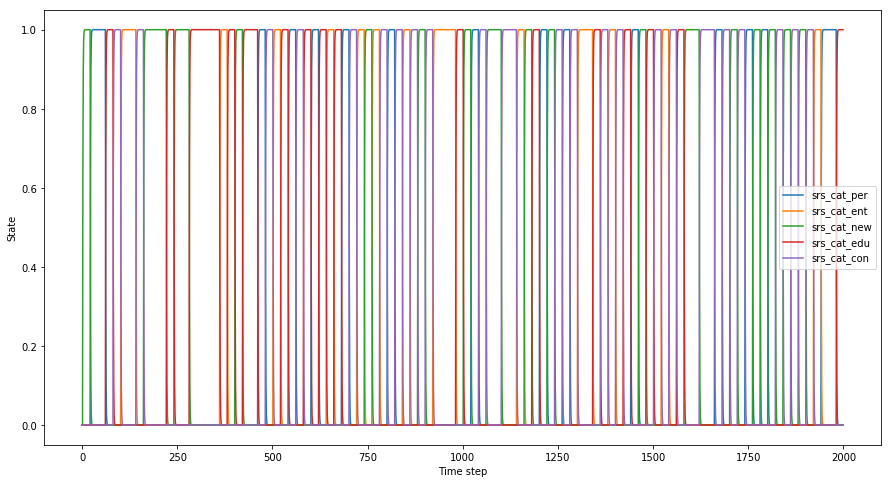

In [27]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

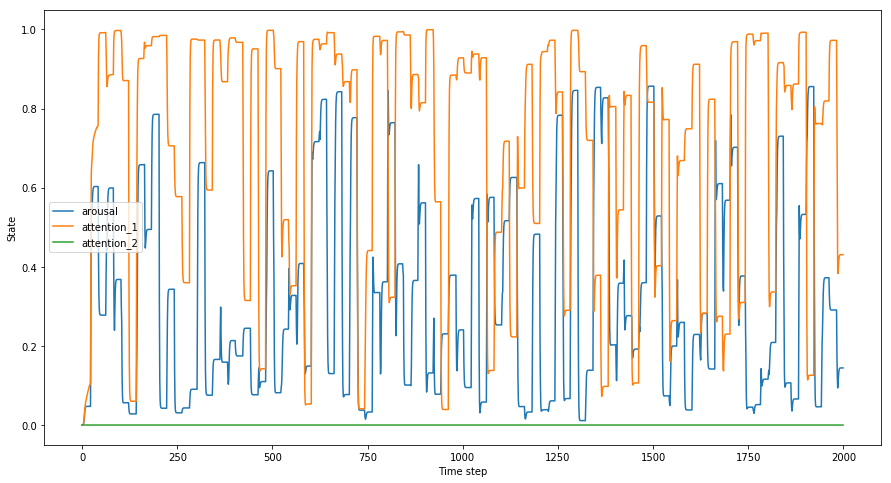

In [28]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

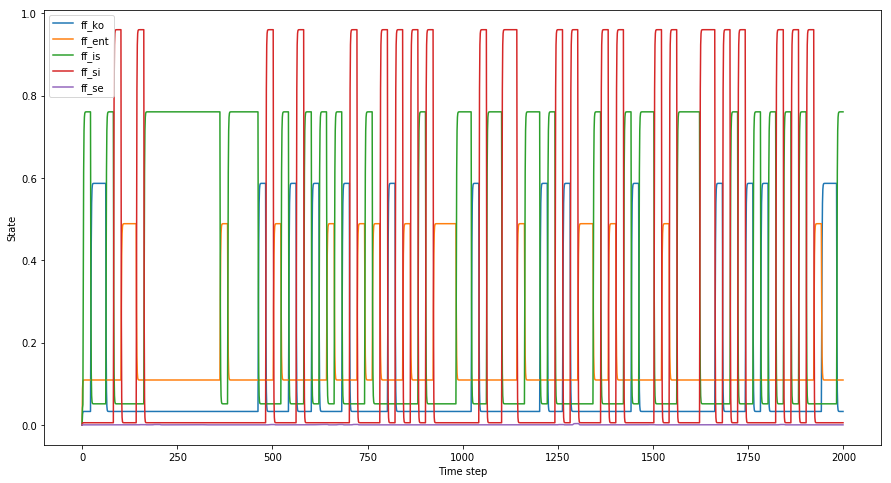

In [29]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

In [30]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

KeyError: "['dissatisfaction'] not in index"

### preps and ssr's

In [ ]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

In [ ]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

In [ ]:
reactions2[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns

# Agent 3

In [ ]:
inputsDF, parameters = model.run_message_sequence(messages3.values, a3_traits,parameters, 'nb3')

In [ ]:
parameters

## Inputs

### Message Categories

In [ ]:
inputsDF[['msg_cat_per', 'msg_cat_ent', 'msg_cat_new', 'msg_cat_edu', 'msg_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Message characteristics

In [ ]:
inputsDF[['msg_rel', 'msg_qua', 'msg_sen', 'msg_sal', 'msg_med', 'msg_com', 'msg_que']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Sensory states

In [ ]:
inputsDF[['srs_cat_per', 'srs_cat_ent', 'srs_cat_new', 'srs_cat_edu', 'srs_cat_con']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Arousal, attention

In [ ]:
inputsDF[['arousal', 'attention_1', 'attention_2']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### FFs

In [ ]:
inputsDF[['ff_ko', 'ff_ent', 'ff_is', 'ff_si', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Satisfaction, dissatisfaction

In [ ]:
inputsDF[['satisfaction', 'dissatisfaction', 'ff_se']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### preps and ssr's

In [ ]:
inputsDF[['prep_like', 'ssr_pe_l', 'prep_share', 'ssr_pe_s', 'prep_comm', 'ssr_pe_c']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Outputs

In [ ]:
inputsDF[['like', 'share', 'comment']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

### Expected reactions

In [ ]:
reactions3[['share', 'comment', 'like']].plot()
plt.ylabel('State')
plt.xlabel('Time step')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
inputsDF.columns